# ANIME CHALLENGE
By: Andrés Acosta 

Description: In this challenge we're going to use a Recommender System for anime user's based on their previous ratings with animes that they don't have see. The dataset is obtained from Kaggle (https://www.kaggle.com/CooperUnion/anime-recommendations-database) where two csf files have been obtained: anime.csv and rating.csv

In particular, this challenge can be accomplished through two models. The first one using the correlation function between two series by means of the corrwith () function by which an anime is selected and then compared with the rest of the anime by means of its correlation. The second (more sophisticated) uses the Memory-Based Collaborative Filtering, through which the data is trained by means of a user-item matrix where similarities are calculated. 

In both models the results are constructed throught a pivot table where it can see what anime has been see and what not by users. 

The data pre-processing are a quite different in both model. In model 1 the -1 values are impute by NaN values from rating database are once the rating anime serie is constructed, those -1 values are dropped. On the other hand, model 2 requires severals data pre-processing to training the data. First the -1 values from ratings dataset are impute by NaN; this is because we need a clean histogram for a better statistical description. The pivot-table has to be normalized to remove those users that have been rating for one time. In this normalized procedure, some 0 values will appear on matrix-sparse and for a better training on dataset, those 0 values must to dropped. 

The number of users on dataset must to reduce to less than 10,000 in model 2, this is because an issue of memory resources that appears on training process.

Both models will be made in the selected order and then in the conclusions they will be compared.

## Model 1: Correlation users/anime with corrwith()

In [1]:
#load basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import operator

import seaborn as sns

In [2]:
#Reading csv files

anime=pd.read_csv('anime.csv')

rating=pd.read_csv('rating.csv')

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


It is necessary to impute the -1 value by NaN values in rating for statistics purposes.

Text(0.5, 1.0, 'Rating count')

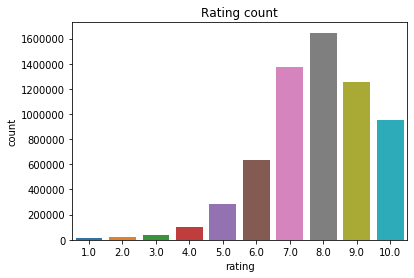

In [5]:
rating.rating.replace({-1: np.nan}, inplace = True)
sns.countplot(x='rating',data=rating)
plt.title('Rating count')

Let's see the type distribution in a pie plot.

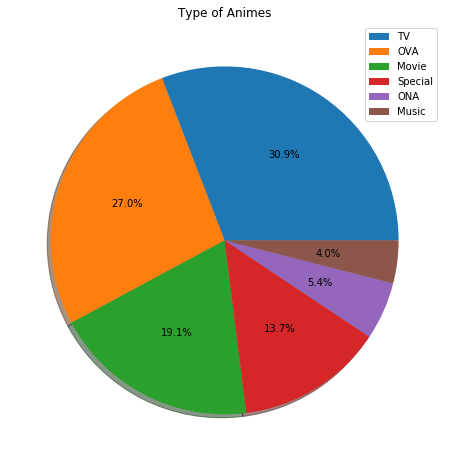

In [6]:
anime['type'].value_counts().plot.pie(autopct='%.1f%%',labels=None,shadow=True,figsize=(8,8))
plt.title('Type of Animes')
plt.ylabel('')
plt.legend(anime['type'].value_counts().index.tolist(),loc='upper right')
plt.show()

Now merge both datasets

In [7]:
df=pd.merge(rating,anime.drop('rating',axis=1),on='anime_id')
df.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


Text(0.5, 1.0, 'df count plot')

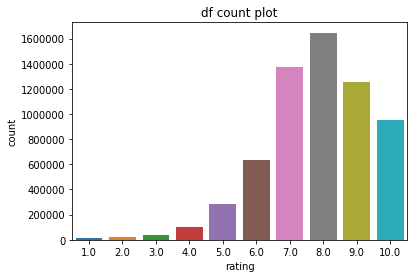

In [8]:
sns.countplot(x='rating',data=df)
plt.title('df count plot')

# Exploratory Data Analysis (EDA)
Let's create a ratings dataframe with average rating and number of rating

In [9]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head()

name
What039;s Michael? (TV)                    10.0
Hello Kitty no Circus ga Yatte Kita        10.0
Yokohama Meibutsu: Otoko Katayama-gumi!    10.0
Midoriyama Koukou Koushien-hen             10.0
Asari-chan: Ai no Marchen Shoujo           10.0
Name: rating, dtype: float64

In [10]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head()

name
Death Note                         34226
Sword Art Online                   26310
Shingeki no Kyojin                 25290
Code Geass: Hangyaku no Lelouch    24126
Angel Beats!                       23565
Name: rating, dtype: int64

Now, let's define "rating" that contain the anime name (serie, movie,etc)

In [11]:
ratings=pd.DataFrame(df.groupby('name')['rating'].mean
                     ())
ratings.head()

,rating
name,
""";0"";",4.764706
""";Aesop""; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",1.000000
""";Bungaku Shoujo""; Kyou no Oyatsu: Hatsukoi",7.343307
""";Bungaku Shoujo""; Memoire",7.744713
""";Bungaku Shoujo""; Movie",7.840154


Now set the number of ratings columns

In [12]:
ratings['num of ratings']=pd.DataFrame(df.groupby('name')['rating'].count())
ratings['num of ratings']= ratings['num of ratings'].replace('&quot','"')


ratings.head()

,rating,num of ratings
name,,
""";0"";",4.764706,17
""";Aesop""; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",1.000000,1
""";Bungaku Shoujo""; Kyou no Oyatsu: Hatsukoi",7.343307,635
""";Bungaku Shoujo""; Memoire",7.744713,662
""";Bungaku Shoujo""; Movie",7.840154,1295


Some histograms to see the distribution

Text(0.5, 1.0, 'Number of Ratings')

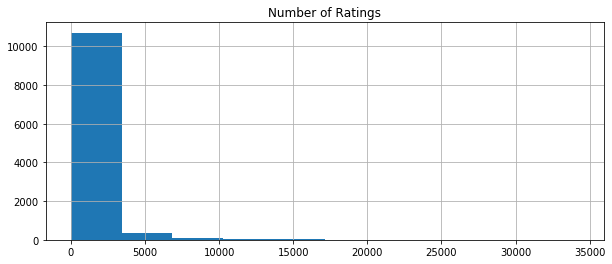

In [13]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=10)
plt.title('Number of Ratings')

Text(0.5, 0, 'Anime rating Score')

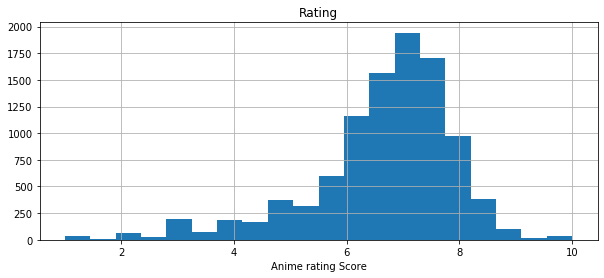

In [14]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=20)
plt.title('Rating')
plt.xlabel('Anime rating Score')

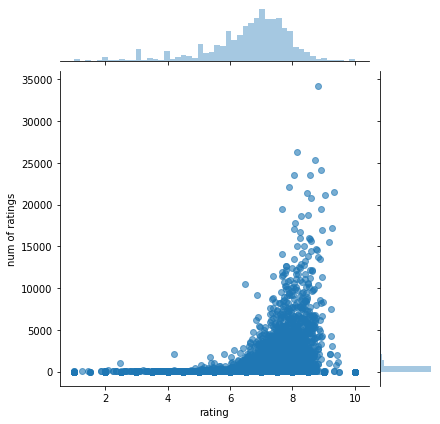

In [15]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.6)

# Recommending Similar Anime
The first step is to see a matrix with the user_id on one acces and the anime_id on another axis whose results will cells with the rating user gave to the anime, as follow:

In [16]:
animemat=df.pivot_table(index='user_id',columns='name',values='rating')
animemat.head()

name,""";0"";",""";Aesop""; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",""";Bungaku Shoujo""; Kyou no Oyatsu: Hatsukoi",""";Bungaku Shoujo""; Memoire",""";Bungaku Shoujo""; Movie",""";Eiji"";",.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It can see NaN values. It is expected because most people not seen most of the animes. Now, let's take a look to the top 10 anime's rated

In [17]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
name,,
Death Note,8.834629,34226
Sword Art Online,8.140213,26310
Shingeki no Kyojin,8.725741,25290
Code Geass: Hangyaku no Lelouch,8.927796,24126
Angel Beats!,8.549714,23565
Elfen Lied,8.064434,23528
Naruto,7.893888,22071
Fullmetal Alchemist: Brotherhood,9.322741,21494
Fullmetal Alchemist,8.453356,21332


Now let's choose Death note and Naruto animes and grabs the user ratings for those two:

In [18]:
death_note_ratings=animemat['Death Note']
naruto_ratings=animemat['Naruto']
death_note_ratings.head()

user_id
1     NaN
2     NaN
3    10.0
5     4.0
7     9.0
Name: Death Note, dtype: float64

Now we can use the corrwith() method in order to get correlations between two data series:

In [19]:
similar_to_death_note=animemat.corrwith(death_note_ratings)
similar_to_naruto=animemat.corrwith(naruto_ratings)

C:\Users\andre\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\andre\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


It is important to remove the NaN values and using a DataFrame instead of a series:

In [20]:
corr_death_note=pd.DataFrame(similar_to_death_note,columns=['Correlation'])
corr_death_note.dropna(inplace=True)
corr_death_note.head(15)

,Correlation
name,
""";0"";",0.133440
""";Bungaku Shoujo""; Kyou no Oyatsu: Hatsukoi",0.104206
""";Bungaku Shoujo""; Memoire",0.089254
""";Bungaku Shoujo""; Movie",0.196000
""";Eiji"";",0.490290
.hack//G.U. Returner,0.131656
.hack//G.U. Trilogy,0.192746
.hack//G.U. Trilogy: Parody Mode,0.163024
.hack//Gift,0.033718


In [21]:
corr_death_note.sort_values('Correlation',ascending=False).head(10)

,Correlation
name,
Saru to Kani no Gassen,1.0
Maicching Machiko-sensei,1.0
Sukeban Shoukai Cutie Lemon,1.0
LolitA☆Strawberry in Summer,1.0
Ginga Tetsudou 999: Hoshizora wa Time Machine,1.0
Baby Baachan,1.0
Crazy Monkey,1.0
Subarashii Sekai,1.0
Kujira (1952),1.0


In [22]:
corr_death_note=corr_death_note.join(ratings['num of ratings'])
corr_death_note.head()

,Correlation,num of ratings
name,,
""";0"";",0.133440,17
""";Bungaku Shoujo""; Kyou no Oyatsu: Hatsukoi",0.104206,635
""";Bungaku Shoujo""; Memoire",0.089254,662
""";Bungaku Shoujo""; Movie",0.196000,1295
""";Eiji"";",0.490290,14


Sorting values

In [23]:
corr_death_note[corr_death_note['num of ratings']>500].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
name,,
Death Note,1.000000,34226
Death Note Rewrite,0.485444,3006
Code Geass: Hangyaku no Lelouch R2,0.358927,21124
Grappler Baki: Saidai Tournament-hen,0.358749,598
Code Geass: Hangyaku no Lelouch,0.351290,24126


Now the same for Naruto

In [24]:
corr_naruto = pd.DataFrame(similar_to_naruto,columns=['Correlation'])
corr_naruto.dropna(inplace=True)
corr_naruto = corr_naruto.join(ratings['num of ratings'])
corr_naruto[corr_naruto['num of ratings']>500].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
name,,
Naruto,1.000000,22071
Naruto: Takigakure no Shitou - Ore ga Eiyuu Dattebayo!,0.612857,2719
Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!!,0.594234,884
Naruto Narutimate Hero 3: Tsuini Gekitotsu! Jounin vs. Genin!! Musabetsu Dairansen taikai Kaisai!!,0.588099,2101
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!,0.582344,5897


## Model 2: Memory-based Collaborative filtering 

This model its created for one type of anime. As we see on pie plot, there are 6 typs of anine; in our case we select OVA anime (if we want another type, the sintaxis must be replaced i.e anime_type=anime[anime['type']=="type of anime"]


In [25]:
anime_ova = anime[anime['type']=='OVA']
anime_ova.head()

,anime_id,name,genre,type,episodes,rating,members
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83,129307
41,32366,Gintama°: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69,16947
52,30709,Kamisama Hajimemashita: Kako-hen,"Comedy, Demons, Fantasy, Shoujo, Supernatural",OVA,4,8.64,33422
66,777,Hellsing Ultimate,"Action, Horror, Military, Seinen, Supernatural...",OVA,10,8.59,297454


Now, let merge both data frames (anime and rating) by anime_id columns

In [26]:
mer=rating.merge(anime_ova,left_on='anime_id',right_on='anime_id',suffixes=['_user',""])
mer.rename(columns={'rating_user':'user_rating'},inplace=True)
df.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6.0,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,NaN,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


It is recommended  to reduce df in 10,000 users for computer memory purpose

In [27]:
mer=mer[['user_id','name', 'user_rating']]
df_sub=mer[mer.user_id<=1000]
df_sub.describe()


,user_id,user_rating
count,8317.000000,6067.000000
mean,506.644824,7.450140
std,281.200658,1.657227
min,1.000000,1.000000
25%,271.000000,7.000000
50%,497.000000,8.000000
75%,753.000000,9.000000
max,1000.000000,10.000000


Now we're ready to create our Memory-based Collaborative Filtering model. The first step is to create a pivot table:

In [28]:
pt = df_sub.pivot_table(index=['user_id'], columns=['name'], values='user_rating')
print(pt.shape)
pt.head()

(617, 1001)


name,""";Bungaku Shoujo""; Kyou no Oyatsu: Hatsukoi",""";Bungaku Shoujo""; Memoire",.hack//G.U. Returner,.hack//Gift,.hack//Liminality,.hack//Quantum,12-sai.,15 Bishoujo Hyouryuuki,30th Gundam Perfect Mission,3Ping Lovers!☆Ippu Nisai no Sekai e Youkoso♪ The Animation,...,Zan Sayonara Zetsubou Sensei Bangaichi,Zetsuai 1989,Zetsumetsu Kigu Shoujo: Amazing Twins,Zettai Junpaku♡Mahou Shoujo,Zettai Junshu☆Kyousei Kozukuri Kyokashou!!,Zettai Karen Children OVA: Aitazousei! Ubawareta Mirai?,Zettai Shougeki: Platonic Heart,eX-Driver,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1, 'Heatmap Pivot Table')

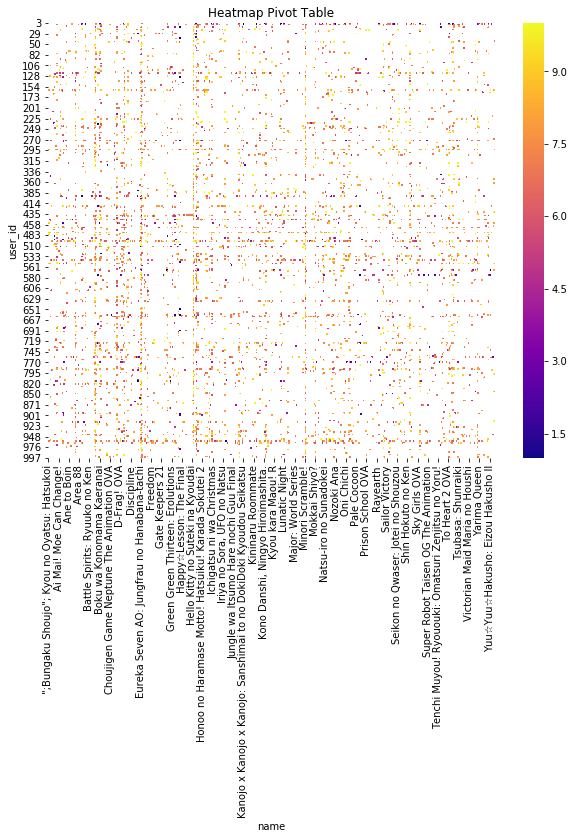

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(pt,cmap='plasma')
plt.title('Heatmap Pivot Table')

Notice that pivot table that we created, look like animemat from model 1. For standarize purpose, we are going to remove those users with 1 rating and those who had rated just one time:

In [29]:
#Normalize
pt_norm = pt.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

In [30]:
# Drop all columns containing only zeros representing users who did not rate
pt_norm.fillna(0, inplace=True)
pt_norm = pt_norm.T
pt_norm = pt_norm.loc[:, (pt_norm != 0).any(axis=0)]

pt_norm.head()

user_id,5,7,11,14,17,18,20,21,23,24,...,979,980,981,982,984,986,992,993,995,996
name,,,,,,,,,,,,,,,,,,,,,
""";Bungaku Shoujo""; Kyou no Oyatsu: Hatsukoi",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
""";Bungaku Shoujo""; Memoire",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//G.U. Returner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Gift,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Liminality,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The second step is to transform the data into a sparse-matrix:

In [31]:
mat_sparse = sp.sparse.csr_matrix(pt_norm.values)

From this matrix we can now know the computed cosine similarity values between each user/user array pair and item/item array pair. For this purpose we required the scikit-learn as follow:

In [46]:
from sklearn.metrics.pairwise import cosine_similarity


item_similarity = cosine_similarity(mat_sparse)
user_similarity = cosine_similarity(mat_sparse.T)

item_sim_df = pd.DataFrame(item_similarity, index = pt_norm.index, columns = pt_norm.index)
user_sim_df = pd.DataFrame(user_similarity, index = pt_norm.columns, columns = pt_norm.columns)

The cosine similarity it's a metric distance where the ratings are seen as vectors in n-dimensional space. The similarity it's defined by the angle between these vectors. By this information, we can know two things: 1) shows with highest/lowes cosine similarity and 2) highest/lowest user similarity. Before to know this, let's define the functions for each case:

In [47]:
def top_animes(anime_name):
    count = 1
    print('Similar shows to {} include:\n'.format(anime_name))
    for item in item_sim_df.sort_values(by = anime_name, ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, item))
        count +=1  
        

In [48]:
def top_users(user):
    
    if user not in pt_norm.columns:
        return('No data available on user {}'.format(user))
    
    print('Most Similar Users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, Similarity value: {1:.2f}'.format(user, sim))

Now let's take a look one more time to anime ova and pivot table to select the anime_name and user_id in order to evaluate top animes and top users

In [49]:
anime_ova.head(15)

,anime_id,name,genre,type,episodes,rating,members
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83,129307
41,32366,Gintama°: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69,16947
52,30709,Kamisama Hajimemashita: Kako-hen,"Comedy, Demons, Fantasy, Shoujo, Supernatural",OVA,4,8.64,33422
66,777,Hellsing Ultimate,"Action, Horror, Military, Seinen, Supernatural...",OVA,10,8.59,297454
92,12029,Uchuu Senkan Yamato 2199,"Action, Drama, Military, Sci-Fi, Space",OVA,26,8.53,44223
103,11917,Major: World Series,"Comedy, Drama, Sports",OVA,2,8.50,13405
125,25781,Shingeki no Kyojin: Kuinaki Sentaku,"Action, Fantasy, Shoujo, Supernatural",OVA,2,8.45,92543
133,2685,Tsubasa: Tokyo Revelations,"Action, Adventure, Drama, Fantasy, Romance, Sh...",OVA,3,8.44,57963
140,10937,Mobile Suit Gundam: The Origin,"Action, Mecha, Military, Sci-Fi, Shounen, Space",OVA,6,8.42,15420


From this we select Hellsing Ultimate and user_id number 5

In [50]:
top_animes('Hellsing Ultimate')

Similar shows to Hellsing Ultimate include:

No. 1: Black Lagoon: Roberta039;s Blood Trail
No. 2: Mobile Suit Gundam 00 Special Edition
No. 3: Kami nomi zo Shiru Sekai: Tenri-hen
No. 4: Hajime no Ippo: Mashiba vs. Kimura
No. 5: Mobile Suit Gundam Unicorn
No. 6: Tales of Phantasia The Animation
No. 7: Top wo Nerae 2! Diebuster
No. 8: Iria: Zeiram The Animation
No. 9: Sousei no Aquarion OVA
No. 10: Aniyome wa Ijippari


In [51]:
top_users(5)

Most Similar Users:

User #566, Similarity value: 0.24
User #771, Similarity value: 0.22
User #511, Similarity value: 0.22
User #11, Similarity value: 0.22
User #293, Similarity value: 0.19
User #165, Similarity value: 0.19
User #559, Similarity value: 0.17
User #793, Similarity value: 0.15
User #392, Similarity value: 0.15
User #298, Similarity value: 0.15


Now its good to create a list with the highest rated shows per similar user and see the name of the show. Also we must to create a function with the weighted average of similar users to determine a potential rating for an input user and show which is a predict rating

In [58]:
def similar_user_recs(user):
    
    if user not in pt_norm.columns:
        return('No data available on user {}'.format(user))
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_users:
        max_score = pt_norm.loc[:, i].max()
        best.append(pt_norm[pt_norm.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_list[:5]    

In [59]:
def predicted_rating(anime_name, user):
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:1000]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:1000]
    rating_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        rating = pt.loc[i, anime_name]
        similarity = user_values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    return sum(rating_list)/sum(weight_list)  

In [60]:
similar_user_recs(5)

[('Hunter x Hunter: Greed Island Final', 3),
 ('Shonan Junai Gumi!', 3),
 ('Hunter x Hunter OVA', 2),
 ('Hunter x Hunter: Greed Island', 2),
 ('Saint☆Oniisan', 2)]

In [61]:
predicted_rating('Hellsing Ultimate', 23)

15.994137738350451

# Conclusion 

From both models it was possible to obtain a system that recommends users based on unseen anime as a function of their rating. With model 1, it was possible to recommend an anime name based on the correlation of the rating number determined by the user, based on a pivot table. The data were worked considering all types of anime (TV, OVA, etc.) and eliminating values -1 from rating datasets.

Model 2 generated by user-items matrix, managed to determine from a type of anime find a list of anime recommended for their similarity. The datasets were normalized as well as the pivot table which allows to defined 4 functions that determinate a list of anime (top_anime) and other users similarity (top_user).

It was concluded that both models are good for this datasets. In particular, model 1 it's simple to apply and serves to have fast results with little pre-process in the data, however it is not good in unstructured data. Model 2 allowed to obtained automatizated results throught a training into our datasets based on user-item matrix. In this particular case, the datasets were standarized and  imputed the -1 values from rating dataset in order to generate a normalized pivot table. However, only one type of anime must be selected in order to obtain the recommendation.



